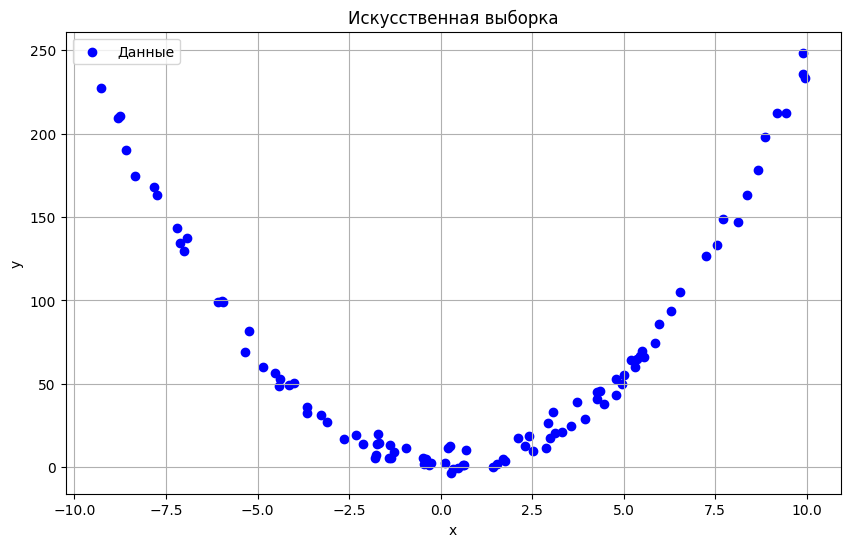

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Параметры генерации данных
m = 100  # Размер выборки
min_value = -10
max_value = 10

# Параметры истинной модели
true_k1 = 2.5
true_k0 = -1.0
true_b = 2.0

# Генерация входных данных x (равномерное распределение)
x_data = np.random.uniform(min_value, max_value, m)

# Генерация шума N (нормальное распределение)
noise = np.random.normal(0, 5, m)  # Стандартное отклонение шума = 5

# Генерация выходных данных y по модели
y_data = true_k1 * x_data**2 + true_k0 * x_data + true_b + noise

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Данные', color='blue')
plt.title('Искусственная выборка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Эпоха 0: Потеря = 25135.6816, k1 = -1.6742, k0 = 0.5839, b = 1.6467
Эпоха 1000: Потеря = 177.0581, k1 = 2.2320, k0 = 0.6006, b = 1.7165
Эпоха 2000: Потеря = 97.8387, k1 = 2.4438, k0 = 0.5205, b = 1.7196
Эпоха 3000: Потеря = 90.9707, k1 = 2.4573, k0 = 0.4393, b = 1.7192
Эпоха 4000: Потеря = 84.9480, k1 = 2.4600, k0 = 0.3617, b = 1.7186
Эпоха 5000: Потеря = 79.5034, k1 = 2.4621, k0 = 0.2880, b = 1.7180
Эпоха 6000: Потеря = 74.5812, k1 = 2.4640, k0 = 0.2179, b = 1.7174
Эпоха 7000: Потеря = 70.1309, k1 = 2.4659, k0 = 0.1512, b = 1.7168
Эпоха 8000: Потеря = 66.1075, k1 = 2.4676, k0 = 0.0878, b = 1.7162
Эпоха 9000: Потеря = 62.4700, k1 = 2.4693, k0 = 0.0275, b = 1.7156

Итоговые параметры модели:
k1 = 2.4709
k0 = -0.0297
b = 1.7149


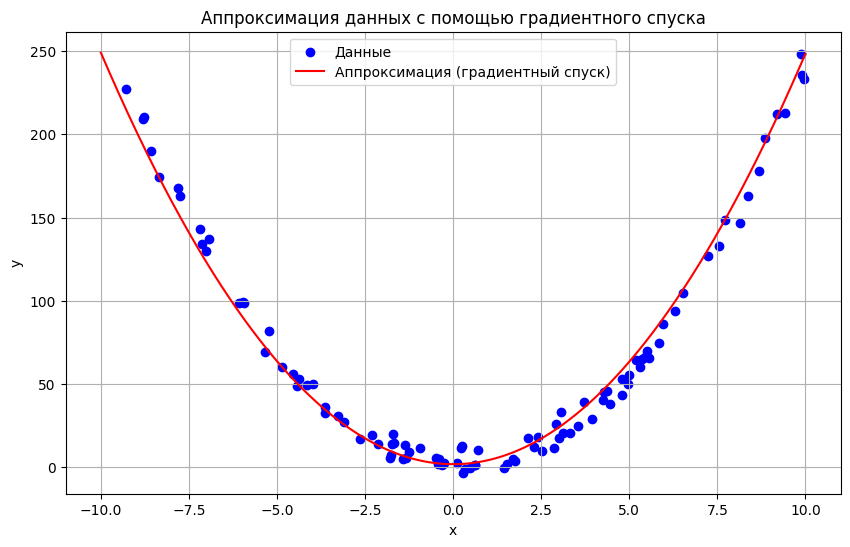

In [43]:
# Перевод данных в тензоры TensorFlow
X = tf.constant(x_data, dtype=tf.float32)
Y = tf.constant(y_data, dtype=tf.float32)

# Инициализация параметров модели (k1, k0, b) случайными значениями
k1 = tf.Variable(np.random.randn(), dtype=tf.float32)
k0 = tf.Variable(np.random.randn(), dtype=tf.float32)
b = tf.Variable(np.random.randn(), dtype=tf.float32)

# Гиперпараметры
learning_rate = 1e-6
epochs = 10000

# Функция потерь (среднеквадратичная ошибка)
def loss_fn():
    y_pred = k1 * X**2 + k0 * X + b
    return tf.reduce_mean(tf.square(Y - y_pred))

# Оптимизатор градиентного спуска
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Списки для отслеживания потерь
loss_history = []

# Тренировочный цикл
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn()
    gradients = tape.gradient(loss, [k1, k0, b])
    optimizer.apply_gradients(zip(gradients, [k1, k0, b]))
    
    # Сохранение истории потерь
    loss_history.append(loss.numpy())
    
    # Периодический вывод информации
    if epoch % 1000 == 0:
        print(f"Эпоха {epoch}: Потеря = {loss.numpy():.4f}, k1 = {k1.numpy():.4f}, k0 = {k0.numpy():.4f}, b = {b.numpy():.4f}")

# Итоговые параметры
print("\nИтоговые параметры модели:")
print(f"k1 = {k1.numpy():.4f}")
print(f"k0 = {k0.numpy():.4f}")
print(f"b = {b.numpy():.4f}")

# Визуализация аппроксимированной модели
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Данные', color='blue')
# Создание плотной сетки для плавного графика аппроксимации
x_plot = np.linspace(min_value, max_value, 1000)
y_plot = k1.numpy() * x_plot**2 + k0.numpy() * x_plot + b.numpy()
plt.plot(x_plot, y_plot, label='Аппроксимация (градиентный спуск)', color='red')
plt.title('Аппроксимация данных с помощью градиентного спуска')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
